Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score




Data Collection and Preprocessing

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/CVD_nominal.csv')

#Number of rows and columns in the data set
df.shape

(2009, 13)

In [ ]:
#print first 5 rows of the dataset
df.head()

,Gender,Age,Diabetes mellitus,Current Smoking,BMI,Systolic,Diastolic,Cholesterol,Atrial Fibrillation,Number of Vascular Beds,Cardiovascular Event in Past Year,Type of Cardiovascular Treatment,Recurrence of Heart Disease
0,Male,69,Yes,Yes,34,134,82,239,Yes,2,Yes,Medicine,Yes
1,Female,75,Yes,No,25,136,80,237,Yes,1,No,Surgery,Yes
2,Female,37,Yes,Yes,27,120,80,198,No,3,No,Medicine,No
3,Male,35,No,Yes,20,122,79,190,No,2,No,Surgery,No
4,Male,39,Yes,No,32,137,89,233,Yes,2,Yes,Medicine,Yes


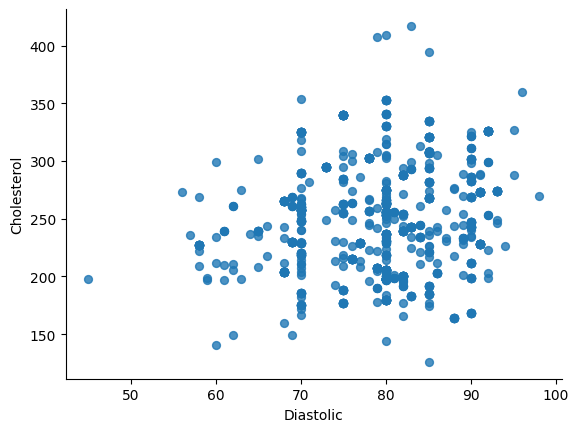

In [ ]:
# @title Diastolic vs Cholesterol

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Diastolic', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

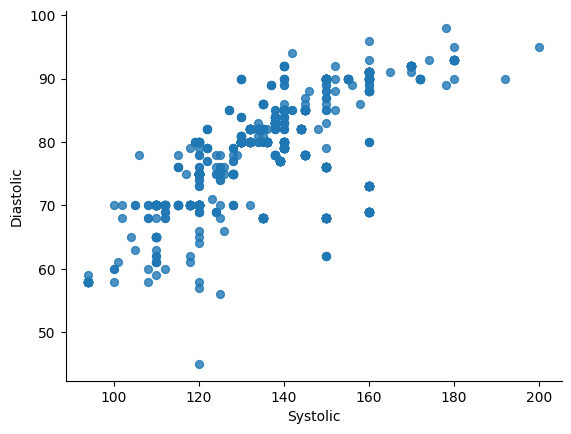

In [ ]:
# @title Systolic vs Diastolic

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Systolic', y='Diastolic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

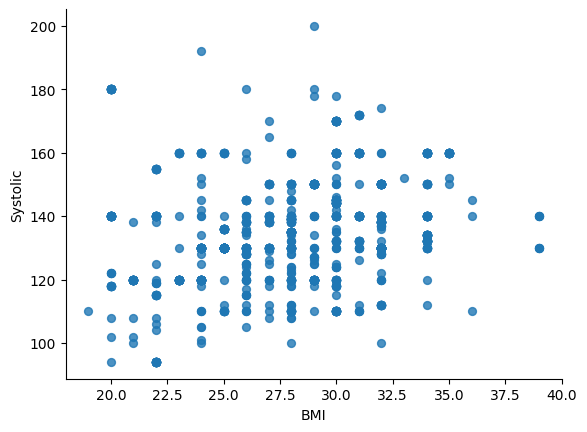

In [ ]:
# @title BMI vs Systolic

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='BMI', y='Systolic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

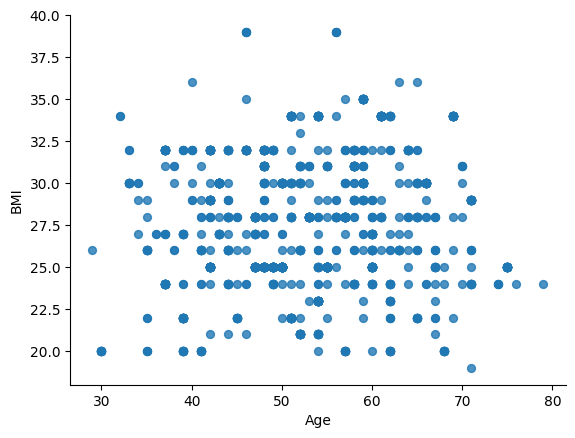

In [ ]:
# @title Age vs BMI

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='BMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

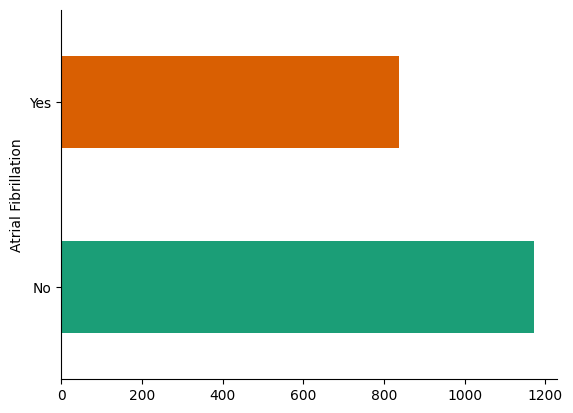

In [ ]:
# @title Atrial Fibrillation

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Atrial Fibrillation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

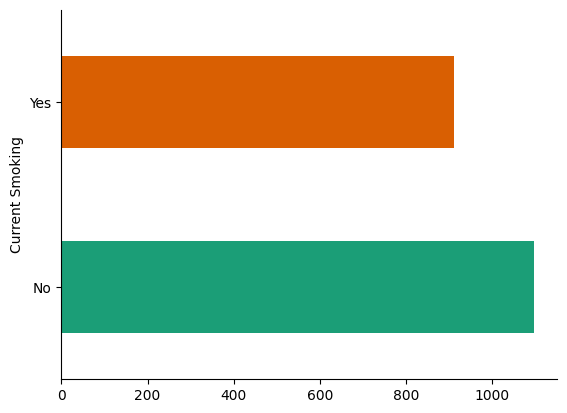

In [ ]:
# @title Current Smoking

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Current Smoking').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

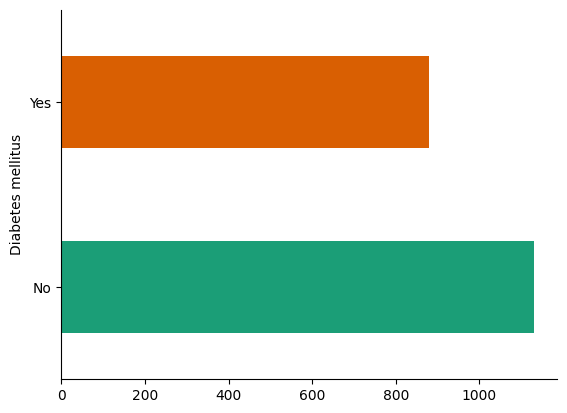

In [ ]:
# @title Diabetes mellitus

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Diabetes mellitus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

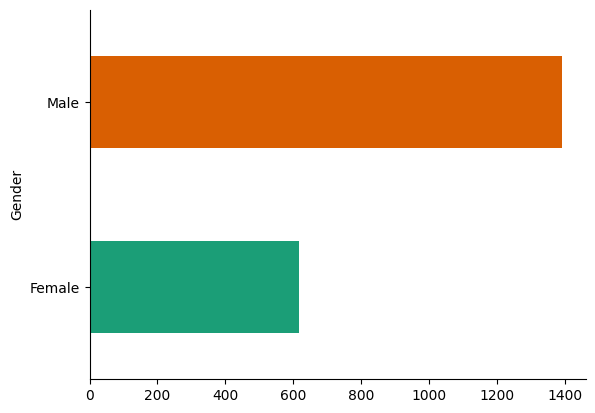

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

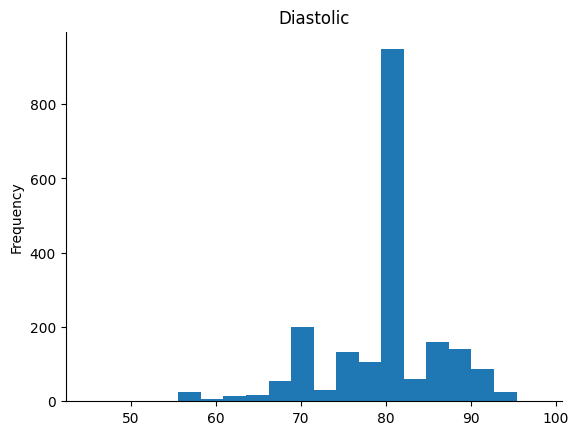

In [ ]:
# @title Diastolic

from matplotlib import pyplot as plt
df['Diastolic'].plot(kind='hist', bins=20, title='Diastolic')
plt.gca().spines[['top', 'right',]].set_visible(False)

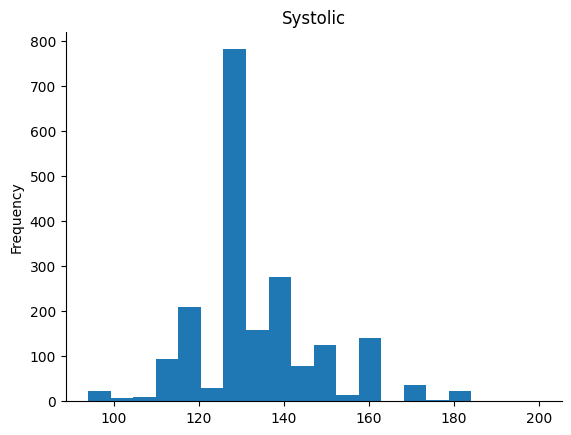

In [ ]:
# @title Systolic

from matplotlib import pyplot as plt
df['Systolic'].plot(kind='hist', bins=20, title='Systolic')
plt.gca().spines[['top', 'right',]].set_visible(False)

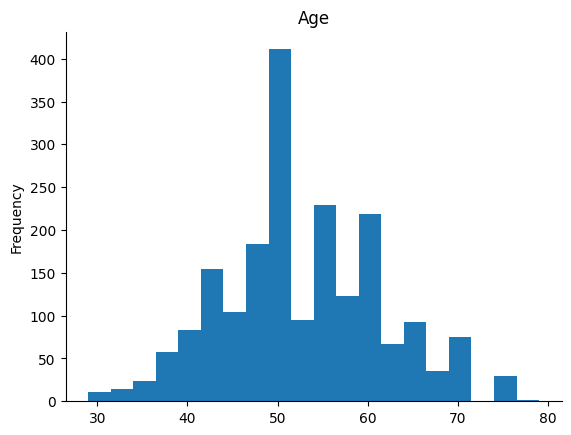

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

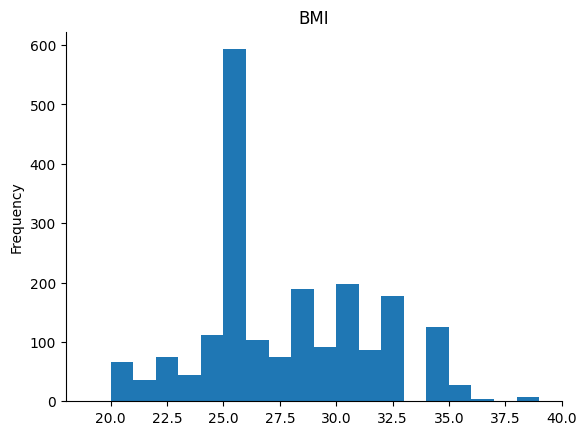

In [ ]:
# @title BMI

from matplotlib import pyplot as plt
df['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

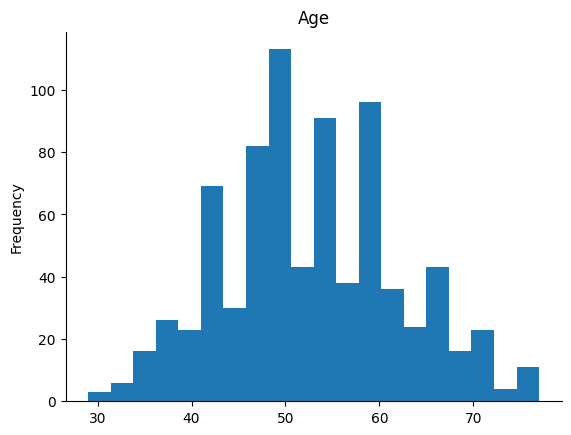

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

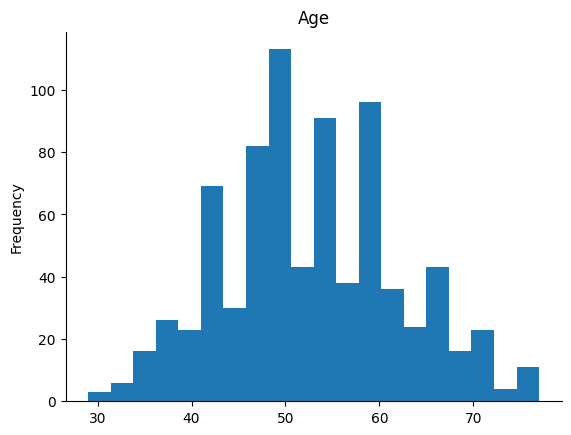

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

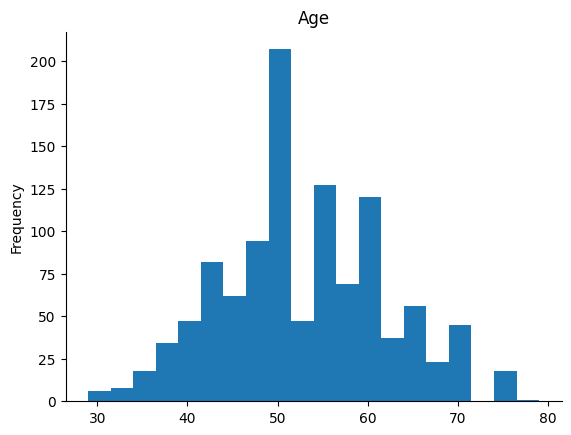

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             2009 non-null   object
 1   Age                                2009 non-null   int64 
 2   Diabetes mellitus                  2009 non-null   object
 3   Current Smoking                    2009 non-null   object
 4   BMI                                2009 non-null   int64 
 5   Systolic                           2009 non-null   int64 
 6   Diastolic                          2009 non-null   int64 
 7   Cholesterol                        2009 non-null   int64 
 8   Atrial Fibrillation                2009 non-null   object
 9   Number of Vascular Beds            2009 non-null   int64 
 10  Cardiovascular Event in Past Year  2009 non-null   object
 11  Type of Cardiovascular Treatment   2009 non-null   object
 12  Recurr

In [ ]:
# Display descriptive statistics
df.describe()

,Age,BMI,Systolic,Diastolic,Cholesterol,Number of Vascular Beds
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,52.453459,27.270781,134.371329,79.497262,236.865107,1.844699
std,8.903866,3.731575,14.438029,6.783220,45.707881,0.880721
min,29.000000,19.000000,94.000000,45.000000,126.000000,0.000000
25%,47.000000,25.000000,130.000000,77.000000,198.000000,1.000000
50%,51.000000,26.000000,130.000000,80.000000,228.000000,2.000000
75%,59.000000,30.000000,140.000000,82.000000,268.000000,3.000000
max,79.000000,39.000000,200.000000,98.000000,417.000000,3.000000


In [ ]:
# Check for missing values
print(df.isnull().sum())

Gender                               0
Age                                  0
Diabetes mellitus                    0
Current Smoking                      0
BMI                                  0
Systolic                             0
Diastolic                            0
Cholesterol                          0
Atrial Fibrillation                  0
Number of Vascular Beds              0
Cardiovascular Event in Past Year    0
Type of Cardiovascular Treatment     0
Recurrence of Heart Disease          0
dtype: int64


Checking Data Balance:


In [ ]:
# Define features and target
X = df.drop(columns=['Recurrence of Heart Disease'])
y = df['Recurrence of Heart Disease']

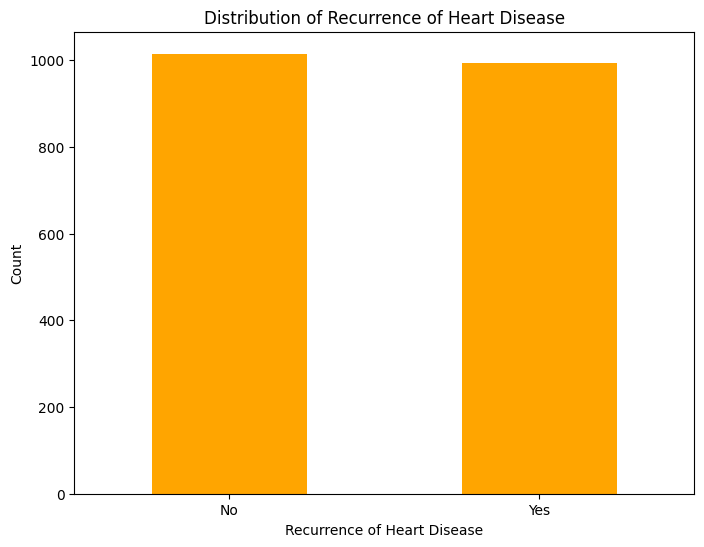

In [ ]:
# Check the distribution of the target variable
target_counts = df['Recurrence of Heart Disease'].value_counts()

# Create a bar chart for the distribution
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Recurrence of Heart Disease')
plt.xlabel('Recurrence of Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

Splitting of the data into training and testing sets

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# y_train is your training labels
class_counts = y_train.value_counts()
print(class_counts)


Recurrence of Heart Disease
Yes    810
No     797
Name: count, dtype: int64


Data Transformation

In [ ]:
# Check the column names in the DataFrame
print(df.columns)


Index(['Gender', 'Age', 'Diabetes mellitus', 'Current Smoking', 'BMI',
       'Systolic', 'Diastolic', 'Cholesterol', 'Atrial Fibrillation',
       'Number of Vascular Beds', 'Cardiovascular Event in Past Year',
       'Type of Cardiovascular Treatment', 'Recurrence of Heart Disease'],
      dtype='object')


Model Training

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df contains your dataset with categorical columns
# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Diabetes mellitus', 'Current Smoking', 'Atrial Fibrillation',
               'Cardiovascular Event in Past Year', 'Type of Cardiovascular Treatment']:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Recurrence of Heart Disease'])
y = df['Recurrence of Heart Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
nb_model = GaussianNB()
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier()

# Train models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
nb_pred = nb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy scores
nb_accuracy = accuracy_score(y_test, nb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Precision scores
nb_precision = precision_score(y_test, nb_pred, pos_label='Yes')
svm_precision = precision_score(y_test, svm_pred, pos_label='Yes')
rf_precision = precision_score(y_test, rf_pred, pos_label='Yes')

# Recall scores
nb_recall = recall_score(y_test, nb_pred, pos_label='Yes')
svm_recall = recall_score(y_test, svm_pred, pos_label='Yes')
rf_recall = recall_score(y_test, rf_pred, pos_label='Yes')

# F1 scores
nb_f1 = f1_score(y_test, nb_pred, pos_label='Yes')
svm_f1 = f1_score(y_test, svm_pred, pos_label='Yes')
rf_f1 = f1_score(y_test, rf_pred, pos_label='Yes')

print("Naive Bayes Model")
print(" Accuracy:", nb_accuracy*100)
print(" Precision:", nb_precision*100)
print(" Recall:", nb_recall*100)
print(" F1 Score:", nb_f1*100)
print("SVM Model")
print(" Accuracy:", svm_accuracy*100)
print(" Precision:", svm_precision*100)
print(" Recall:", svm_recall*100)
print(" F1 Score:", svm_f1*100)
print("Random Forest Model")
print(" Accuracy:", rf_accuracy*100)
print(" Precision:", rf_precision*100)
print(" Recall:", rf_recall*100)
print(" F1 Score:", rf_f1*100)



Naive Bayes Model
 Accuracy: 85.3233830845771
 Precision: 82.05128205128204
 Recall: 86.95652173913044
 F1 Score: 84.43271767810026
SVM Model
 Accuracy: 88.80597014925374
 Precision: 84.5771144278607
 Recall: 92.3913043478261
 F1 Score: 88.31168831168831
Random Forest Model
 Accuracy: 94.5273631840796
 Precision: 91.3265306122449
 Recall: 97.28260869565217
 F1 Score: 94.21052631578948


Confusion Matrix Visualization:

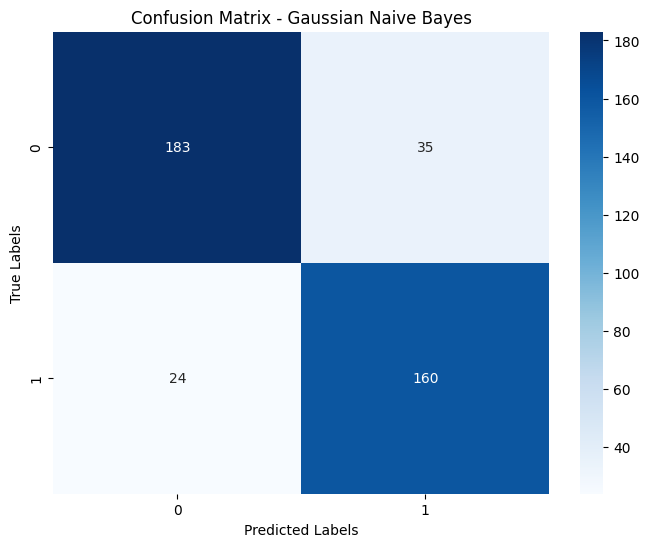

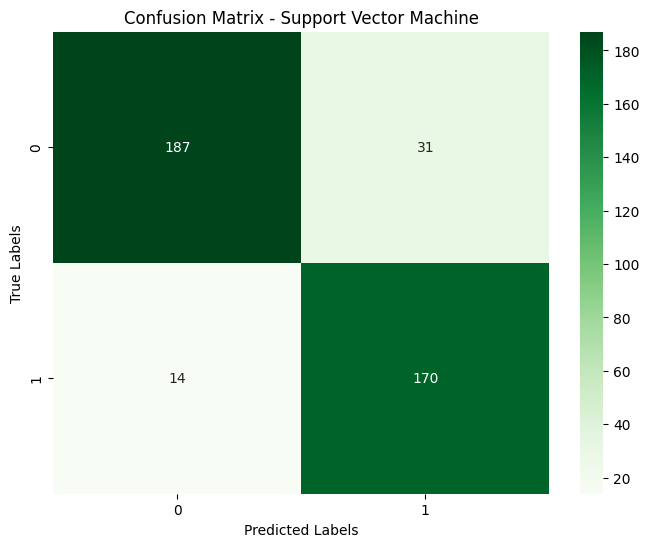

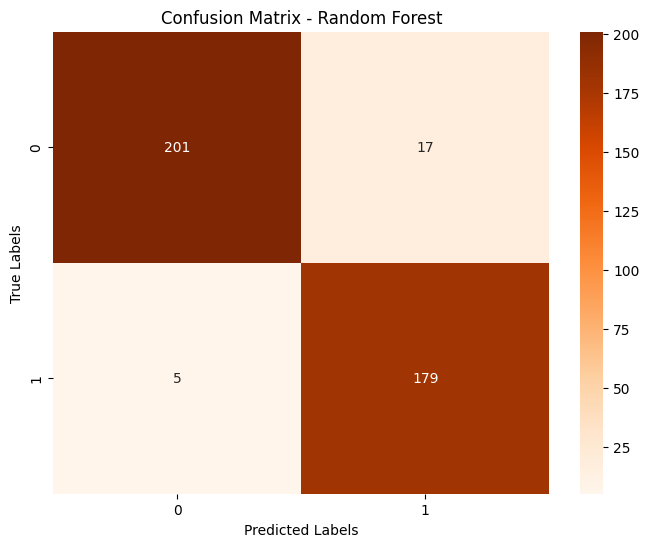

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for Gaussian Naive Bayes (NB)
cm_nb = confusion_matrix(y_test, nb_pred)

# Create a heatmap for the confusion matrix of NB
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

# Calculate confusion matrix for Support Vector Machine (SVM)
cm_svm = confusion_matrix(y_test, svm_pred)

# Create a heatmap for the confusion matrix of SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

# Calculate confusion matrix for Random Forest (RF)
cm_rf = confusion_matrix(y_test, rf_pred)

# Create a heatmap for the confusion matrix of RF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Receiver Operating Characteristic (ROC) Curve:

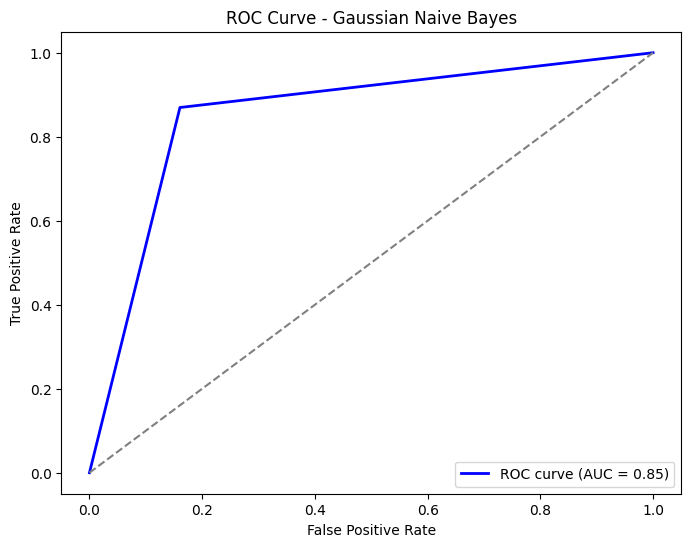

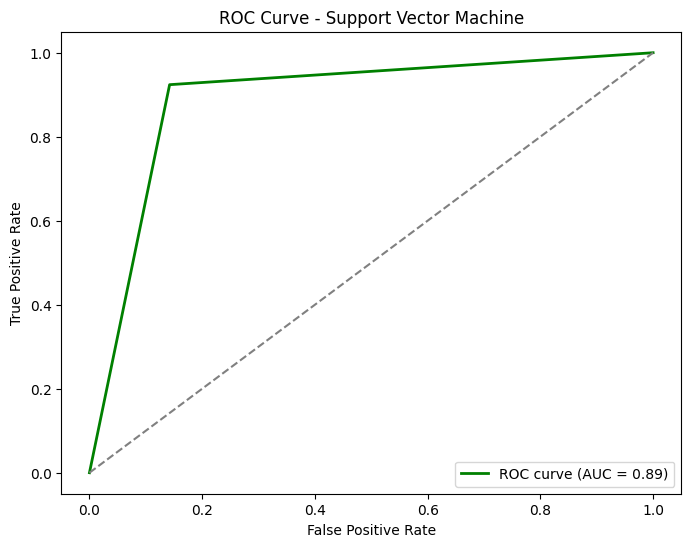

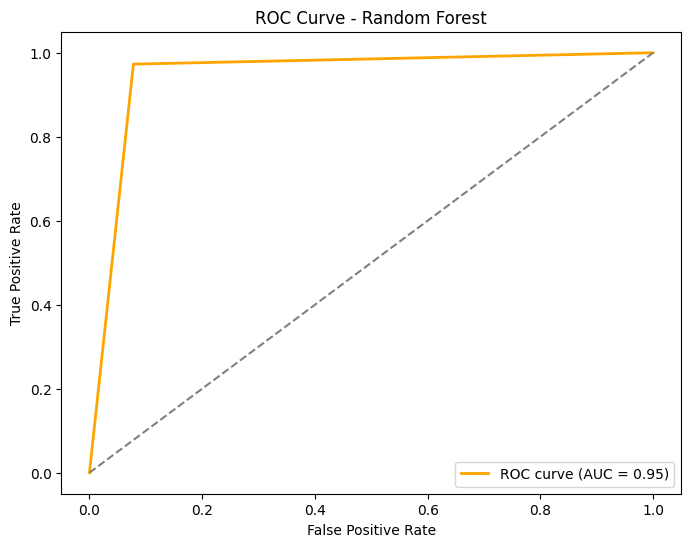

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the CSV file
df = pd.read_csv('/content/CVD_nominal.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Diabetes mellitus', 'Current Smoking', 'Atrial Fibrillation',
               'Cardiovascular Event in Past Year', 'Type of Cardiovascular Treatment',
               'Recurrence of Heart Disease']:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Recurrence of Heart Disease'])
y = df['Recurrence of Heart Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
nb_model = GaussianNB()
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier()

# Train models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions on test data using the Gaussian Naive Bayes model
nb_pred = nb_model.predict(X_test)

# Make predictions on test data using the Support Vector Machine model
svm_pred = svm_model.predict(X_test)

# Make predictions on test data using the Random Forest model
rf_pred = rf_model.predict(X_test)

# Convert 'Yes' and 'No' labels in y_test to binary labels (0 and 1)
y_test = y_test.replace({'Yes': 1, 'No': 0})

# Calculate ROC curve for Gaussian Naive Bayes (NB)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_pred, pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for NB
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Calculate ROC curve for Support Vector Machine (SVM)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_pred, pos_label=1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

# Calculate ROC curve for Random Forest (RF)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_pred, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for RF
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()




Precision-Recall Curve:

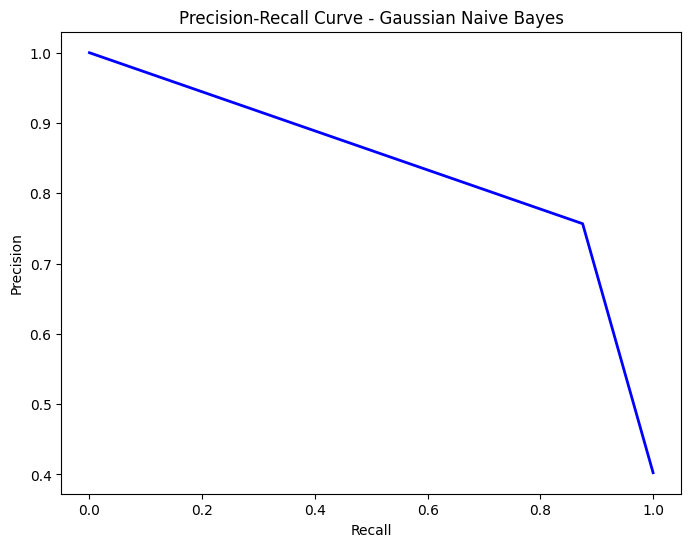

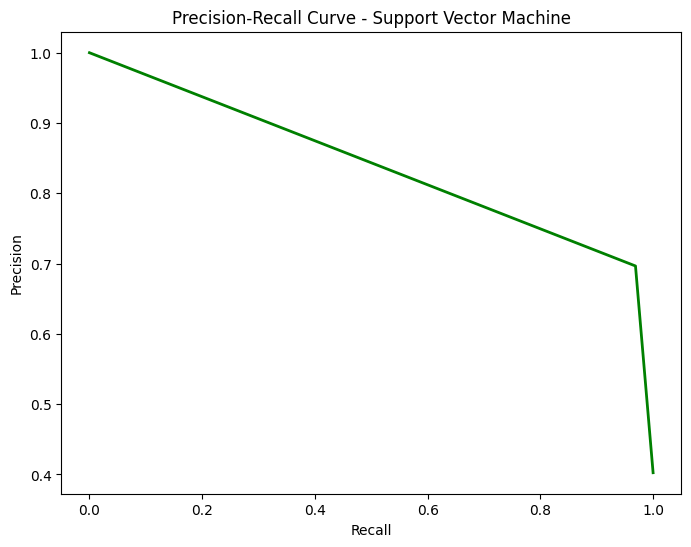

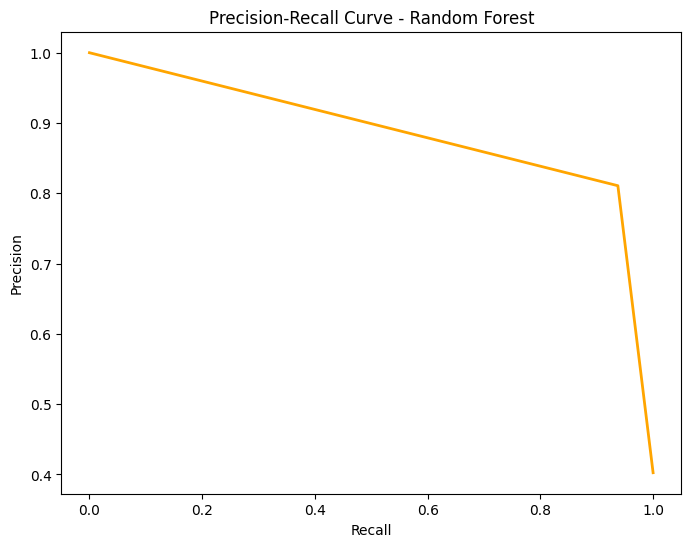

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve for Gaussian Naive Bayes (NB)
precision_nb, recall_nb, _ = precision_recall_curve(y_test, nb_pred)

# Plot precision-recall curve for NB
plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gaussian Naive Bayes')
plt.show()

# Calculate precision-recall curve for Support Vector Machine (SVM)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_pred)

# Plot precision-recall curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Support Vector Machine')
plt.show()

# Calculate precision-recall curve for Random Forest (RF)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_pred)

# Plot precision-recall curve for RF
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='orange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.show()


Predictive Modeling for Recurrence of Cardiovascular Events using Machine Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

treatment_mapping = {'Medicine':1,'Surgery':0}

gender = int(input("Enter your Gender (0 for female, 1 for male): "))
print()
age = int(input("Enter your Age: "))
print()
current_smoking = int(input("Are you currently smoking? (0 for No, 1 for Yes): "))
print()
diabetes = int(input("Do you have diabetes? (0 for No, 1 for Yes): "))
print()
bmi = float(input("Enter your BMI: "))
print()
systolic = float(input("Enter your Systolic Blood Pressure: "))
print()
diastolic = float(input("Enter your Diastolic Blood Pressure: "))
print()
cholesterol = float(input("Enter your Cholesterol level: "))
print()
atrial_fibrillation = int(input("Do you have Atrial Fibrillation? (0 for No, 1 for Yes): "))
print()

print("Select Type of Cardiovascular Treatment:")
for key, value in treatment_mapping.items():
    print(f"{value}: {key}")
cardio_treatment_type = int(input("Enter the corresponding number: "))
print()

vascular_beds = int(input("Enter Number of Vascular Beds: "))
print()
cardio_event_past_year = int(input("Did you have a Cardiovascular Event in the Past Year? (0 for No, 1 for Yes): "))
print()

sample_data = np.array([[gender, age, current_smoking, diabetes, bmi, systolic, diastolic, cholesterol,
                         atrial_fibrillation, vascular_beds, cardio_event_past_year,
                         cardio_treatment_type,]])

predictions = loaded_model.predict(sample_data)

print("Prediction (0=No reccurence, 1=reccurence): ", predictions)

KeyboardInterrupt: Interrupted by user

Hybrid Approach


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from statistics import mode

# Load dataset from CSV
df = pd.read_csv('/content/CVD_nominal.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Diabetes mellitus', 'Current Smoking', 'Atrial Fibrillation', 'Cardiovascular Event in Past Year', 'Type of Cardiovascular Treatment', 'Recurrence of Heart Disease']:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Recurrence of Heart Disease'])
y = df['Recurrence of Heart Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
nb_model = GaussianNB()
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train models
nb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions
nb_pred = nb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Combine predictions using mode
hybrid_pred = []
for nb, rf, svm in zip(nb_pred, rf_pred, svm_pred):
    hybrid_pred.append(mode([nb, rf, svm]))

# Calculate accuracy
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)


Hybrid Model Accuracy: 0.8681592039800995


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from statistics import mode

# Load dataset from CSV
df = pd.read_csv('/content/CVD_nominal.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Diabetes mellitus', 'Current Smoking', 'Atrial Fibrillation', 'Cardiovascular Event in Past Year', 'Type of Cardiovascular Treatment', 'Recurrence of Heart Disease']:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Recurrence of Heart Disease'])
y = df['Recurrence of Heart Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Combine predictions using mode
hybrid_pred = []
for rf, svm in zip(rf_pred, svm_pred):
    hybrid_pred.append(mode([rf, svm]))

# Calculate accuracy
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)


Hybrid Model Accuracy: 0.9502487562189055


Hybrid Model Accuracy: 0.9477611940298507


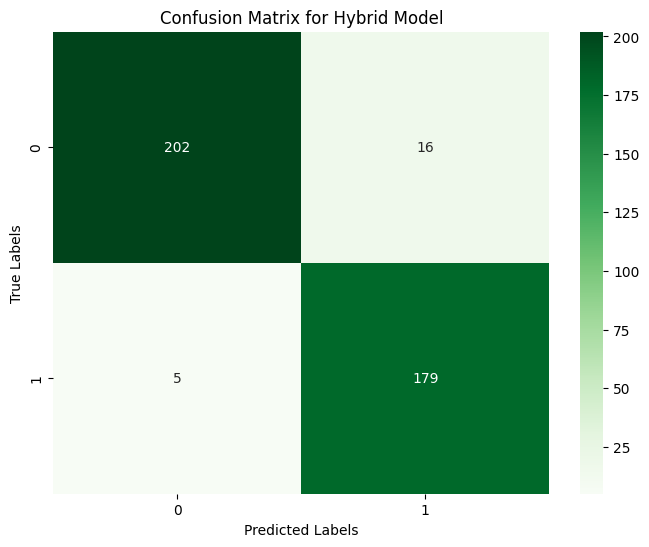

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

# Load dataset from CSV
df = pd.read_csv('/content/CVD_nominal.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Diabetes mellitus', 'Current Smoking', 'Atrial Fibrillation', 'Cardiovascular Event in Past Year', 'Type of Cardiovascular Treatment', 'Recurrence of Heart Disease']:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Recurrence of Heart Disease'])
y = df['Recurrence of Heart Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Combine predictions using mode
hybrid_pred = []
for rf, svm in zip(rf_pred, svm_pred):
    hybrid_pred.append(mode([rf, svm]))

# Calculate accuracy
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, hybrid_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix for Hybrid Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset from CSV
df = pd.read_csv('/content/CVD_nominal.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Diabetes mellitus', 'Current Smoking', 'Atrial Fibrillation', 'Cardiovascular Event in Past Year', 'Type of Cardiovascular Treatment', 'Recurrence of Heart Disease']:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Recurrence of Heart Disease'])
y = df['Recurrence of Heart Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
nb_model = GaussianNB()
svm_model = SVC()

# Train models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions
nb_pred = nb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Combine predictions using mode
hybrid_pred = []
for nb, svm in zip(nb_pred, svm_pred):
    hybrid_pred.append(nb if nb == svm else 1)

# Calculate accuracy
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)


Hybrid Model Accuracy: 0.8159203980099502


In [ ]:
from sklearn.metrics import confusion_matrix

# Create confusion matrices for NB and SVM
nb_cm = confusion_matrix(y_test, nb_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

# Create confusion matrix for the hybrid model
hybrid_cm = confusion_matrix(y_test, hybrid_pred)

print("Confusion Matrix for Naive Bayes:")
print(nb_cm)
print("\nConfusion Matrix for SVM:")
print(svm_cm)
print("\nConfusion Matrix for Hybrid Model:")
print(hybrid_cm)


Confusion Matrix for Naive Bayes:
[[183  35]
 [ 24 160]]

Confusion Matrix for SVM:
[[166  52]
 [ 30 154]]

Confusion Matrix for Hybrid Model:
[[161  57]
 [ 17 167]]


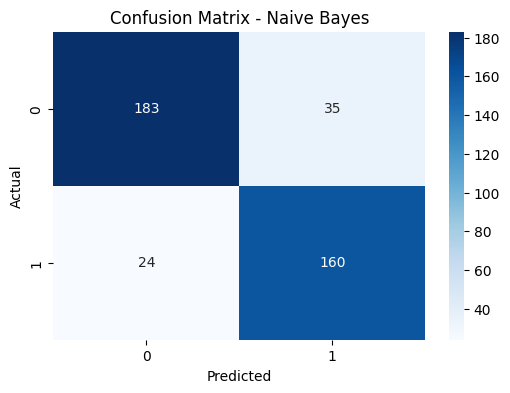

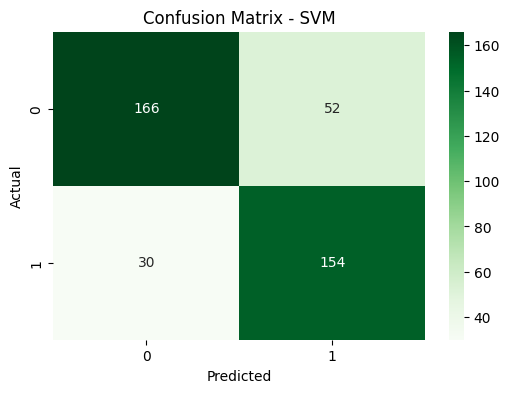

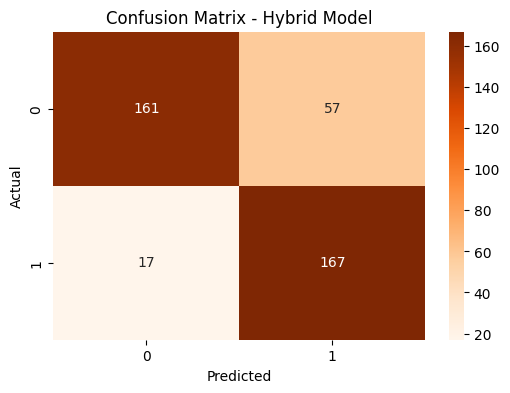

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Hybrid Model
plt.figure(figsize=(6, 4))
sns.heatmap(hybrid_cm, annot=True, cmap='Oranges', fmt='g')
plt.title('Confusion Matrix - Hybrid Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for Combined Model
plt.figure(figsize=(6, 4))
sns.heatmap(combined_cm, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - Combined Model (NB + SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


NameError: name 'combined_cm' is not defined

<Figure size 600x400 with 0 Axes>

Hybrid Model Accuracy: 0.945273631840796


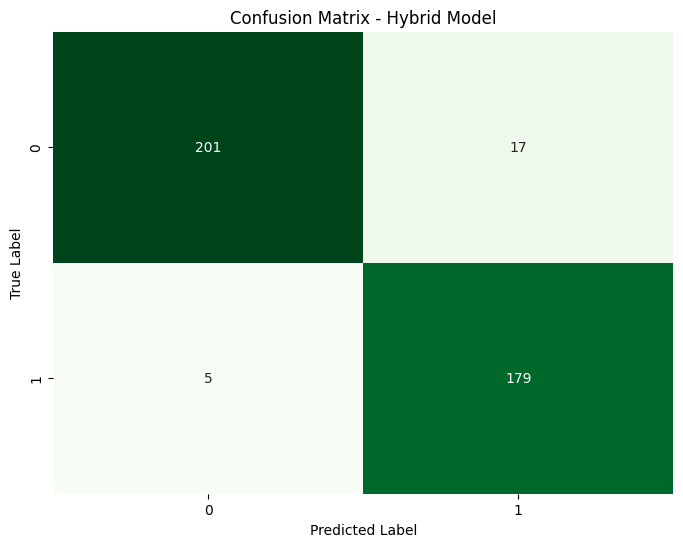

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load dataset from CSV
df = pd.read_csv('/content/CVD_nominal.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Diabetes mellitus', 'Current Smoking', 'Atrial Fibrillation', 'Cardiovascular Event in Past Year', 'Type of Cardiovascular Treatment', 'Recurrence of Heart Disease']:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Recurrence of Heart Disease'])
y = df['Recurrence of Heart Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Combine predictions using mode
hybrid_pred = []
for rf, svm in zip(rf_pred, svm_pred):
    hybrid_pred.append(mode([rf, svm]))

# Calculate accuracy
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, hybrid_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Hybrid Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Hybrid Model Accuracy: 0.8159203980099502


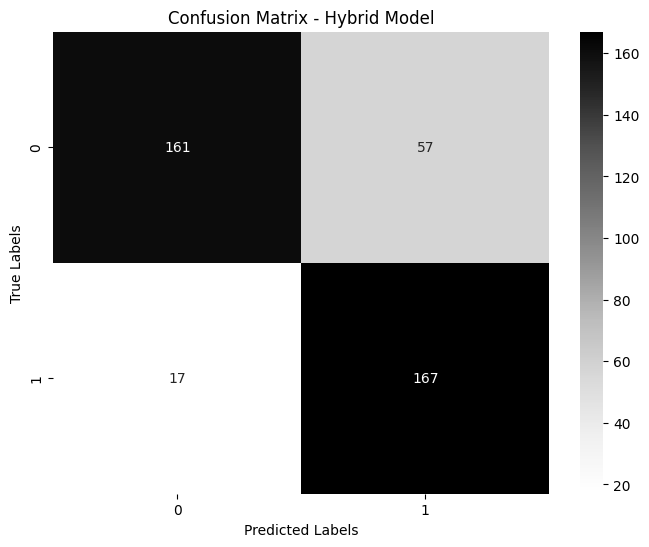

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from CSV
df = pd.read_csv('/content/CVD_nominal.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Diabetes mellitus', 'Current Smoking', 'Atrial Fibrillation', 'Cardiovascular Event in Past Year', 'Type of Cardiovascular Treatment', 'Recurrence of Heart Disease']:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Recurrence of Heart Disease'])
y = df['Recurrence of Heart Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
nb_model = GaussianNB()
svm_model = SVC()

# Train models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions
nb_pred = nb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Combine predictions using mode
hybrid_pred = []
for nb, svm in zip(nb_pred, svm_pred):
    hybrid_pred.append(nb if nb == svm else 1)

# Calculate accuracy
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, hybrid_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greys', fmt='g')
plt.title('Confusion Matrix - Hybrid Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


                              Age       BMI  Systolic  Diastolic  Cholesterol  \
Age                      1.000000  0.081783  0.204580   0.100357     0.113503   
BMI                      0.081783  1.000000  0.273497   0.127266     0.257945   
Systolic                 0.204580  0.273497  1.000000   0.674624     0.214707   
Diastolic                0.100357  0.127266  0.674624   1.000000     0.094331   
Cholesterol              0.113503  0.257945  0.214707   0.094331     1.000000   
Number of Vascular Beds -0.078972 -0.061752  0.014759   0.032356     0.334401   

                         Number of Vascular Beds  
Age                                    -0.078972  
BMI                                    -0.061752  
Systolic                                0.014759  
Diastolic                               0.032356  
Cholesterol                             0.334401  
Number of Vascular Beds                 1.000000  


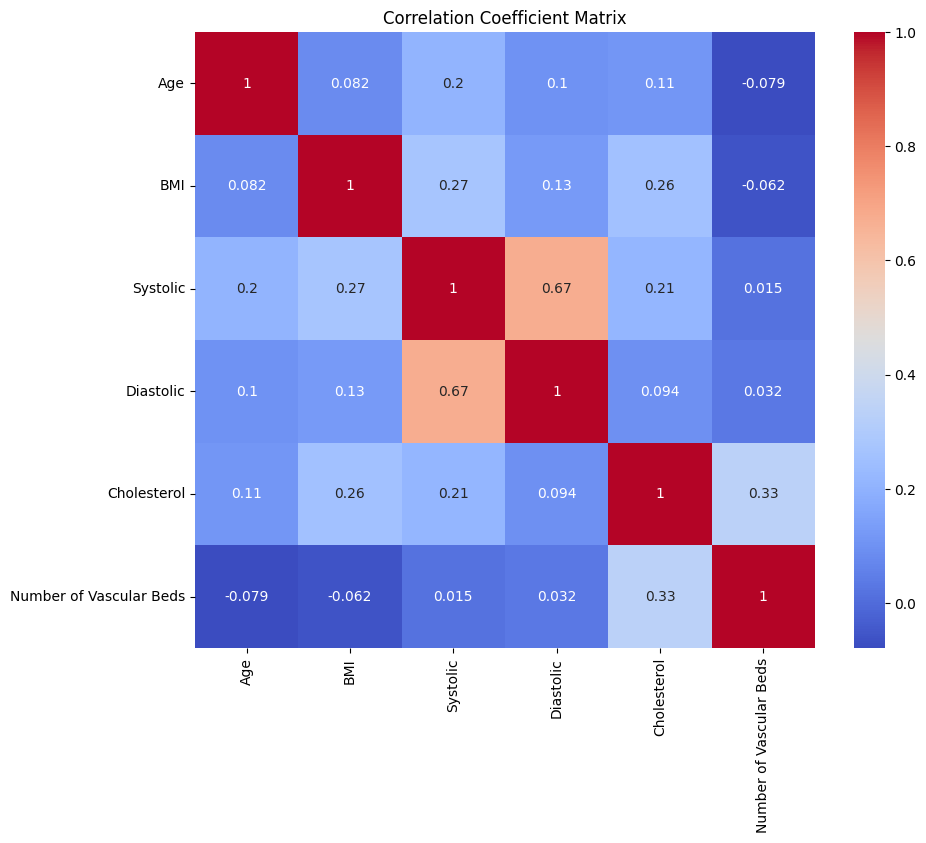

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'path_to_your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/CVD_nominal.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation coefficient matrix
correlation_matrix = numeric_df.corr()

# Display the correlation coefficient matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Coefficient Matrix')
plt.show()


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset from CSV
df = pd.read_csv('/content/CVD_nominal.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Diabetes mellitus', 'Current Smoking', 'Atrial Fibrillation', 'Cardiovascular Event in Past Year', 'Type of Cardiovascular Treatment', 'Recurrence of Heart Disease']:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Recurrence of Heart Disease'])
y = df['Recurrence of Heart Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
nb_model = GaussianNB()
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier()

# Train models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
nb_pred = nb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Accuracy scores
nb_accuracy = accuracy_score(y_test, nb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Naive Bayes Accuracy:", nb_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Naive Bayes Accuracy: 0.8532338308457711
SVM Accuracy: 0.8880597014925373
Random Forest Accuracy: 0.9502487562189055


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import numpy as np

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

with open('random_forest_model.pkl', 'wb') as model_file:
    joblib.dump(rf_model, model_file)

with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = joblib.load(model_file)

